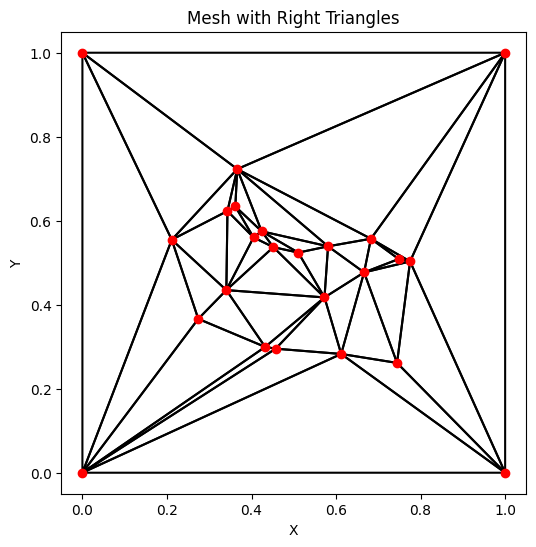

In [11]:
import triangle
import random
import matplotlib.pyplot as plt

# Define the vertices of the domain (rectangle)
vertices = [(0, 0), (0, 1), (1, 1), (1, 0)]

# Generate additional points within the domain
n_points = 20
inner_points = []
for _ in range(n_points):
    x = random.uniform(0.2, 0.8)  # Random x-coordinate within the rectangle
    y = random.uniform(0.2, 0.8)  # Random y-coordinate within the rectangle
    inner_points.append([x, y])

# Combine vertices and inner points
points = vertices + inner_points

# Perform the triangulation
triangulation = triangle.triangulate({'vertices': points})

# Get the resulting triangles
triangles = triangulation['triangles']

# Plot the triangles
plt.figure(figsize=(6, 6))
for simplex in triangles:
    plt.plot([points[i][0] for i in simplex] + [points[simplex[0]][0]],
             [points[i][1] for i in simplex] + [points[simplex[0]][1]], 'k-')

# Plot the vertices
plt.plot(*zip(*points), 'ro')

plt.title('Mesh with Right Triangles')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [12]:
import triangle
import matplotlib.pyplot as plt

# Define the dimensions of the grid
rows = 5
cols = 5

# Generate grid points
points = [(i, j) for i in range(cols+1) for j in range(rows+1)]

# Generate segments to form squares
segments = []
for i in range(cols):
    for j in range(rows):
        p1 = i * (rows + 1) + j
        p2 = p1 + 1
        p3 = (i + 1) * (rows + 1) + j
        p4 = p3 + 1
        segments.extend([(p1, p2), (p1, p3), (p2, p4), (p3, p4)])

# Perform the triangulation, specifying the segments to enforce
triangulation = triangle.triangulate({'vertices': points, 'segments': segments})

# Get the resulting triangles
triangles = triangulation['triangles']

# Plot the triangles
plt.figure(figsize=(6, 6))
for simplex in triangles:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

# Plot the vertices
plt.plot(*zip(*points), 'ro')

plt.title('Mesh with Right Triangles')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


TypeError: list indices must be integers or slices, not tuple

<Figure size 600x600 with 0 Axes>

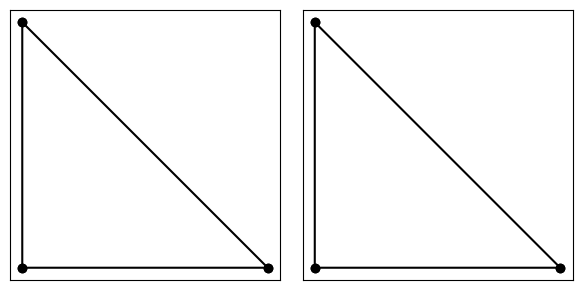

In [7]:
import matplotlib.pyplot as plt
import triangle as tr

A = dict(vertices=[(0, 0), (1, 0), (0, 1)])

# Triangulate the vertices
B = tr.triangulate(A, 'q01D')

C=tr.triangulate(B,'')

# Compare the triangulations and get statistics
comparison = tr.compare(plt, B, C)







In [34]:
import matplotlib.pyplot as plt
import triangle as tr

# Define vertices for an initial triangulation
vertices = [(0, 0), (1, 0), (0, 1)]

# Triangulate the vertices
triangulation = tr.triangulate(dict(vertices=vertices))

# Refine the mesh
refined_triangulation = triangulation.

# Plot the refined triangulation
tr.plot(plt, **refined_triangulation)

# Display the plot
plt.show()



AttributeError: module 'triangle' has no attribute 'refine'

In [ ]:
import matplotlib.pyplot as plt
import triangle as tr

# Define the vertices of the domain
A = dict(vertices=[(0, 0), (1, 0), (0, 1),(1,1)])

# Define the maximum area for each triangle
max_triangle_area = 0.0005  # Adjust this value according to your requirement

# Triangulate the vertices with maximum area constraint
triangulation = tr.triangulate(A,'q90a90')

# Plot the triangulation
comparison = tr.compare(plt, A, triangulation)

# Display the plot
plt.show()


Error:  Maximum area must be greater than zero.


RuntimeError: Triangulation failed -- probably because of invalid geometry on input.

In [1]:
import triangle
import matplotlib.pyplot as plt

# Define the square domain vertices
vertices = [(0, 0), (1, 0), (1, 1), (0, 1)]

# Perform the initial triangulation without specifying segments
triangulation = triangle.triangulate(dict(vertices=vertices, holes=[]))

# Refine the triangulation while preserving diagonal edges
refined_triangulation = triangle.refine(triangulation, optstring="D")

# Plot the refined triangulation with diagonal edges
plt.figure(figsize=(6, 6))
triangle.plot(plt, **refined_triangulation)
plt.axis('equal')
plt.show()


IndexError: Out of bounds on buffer access (axis 0)

In [3]:
import numpy as np
import triangle as tr
import matplotlib.pyplot as plt

# Define input points
points = np.array([[0, 0],
                   [1, 0],
                   [1, 1],
                   [0, 1]])

# Perform diagonal triangulation
triangulation = tr.triangulate({'vertices': points, 'segments': []}, 'pD')

# Plot the triangulation
plt.triplot(points[:, 0], points[:, 1], triangulation['triangles'], color='b')
plt.plot(points[:, 0], points[:, 1], 'ro')  # plot points
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Diagonal Triangulation')
plt.show()


IndexError: Out of bounds on buffer access (axis 0)

In [8]:
import numpy as np
import triangle as tr
import matplotlib.pyplot as plt

def generate_diagonal_mesh(num_elements):
    # Define the square vertices
    vertices = np.array([[0, 0],
                         [1, 0],
                         [1, 1],
                         [0, 1]])

    # Generate the mesh
    mesh = tr.triangulate({'vertices': vertices, 'segments': []}, 'pqD',
                          refinement_func=lambda x, y, r: r < num_elements)

    # Plot the mesh
    plt.triplot(vertices[:, 0], vertices[:, 1], mesh['triangles'], color='b')
    plt.plot(vertices[:, 0], vertices[:, 1], 'ro')  # plot vertices
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Diagonal Triangle Mesh')
    plt.show()

# Example usage: generate a diagonal mesh with 100 total elements
generate_diagonal_mesh(100)


TypeError: triangulate() got an unexpected keyword argument 'refinement_func'

In [9]:
import numpy as np
import triangle as tr
import matplotlib.pyplot as plt

def generate_diagonal_mesh(num_elements):
    # Define the square vertices
    vertices = np.array([[0, 0],
                         [1, 0],
                         [1, 1],
                         [0, 1]])

    # Initial mesh with a single element
    mesh = tr.triangulate({'vertices': vertices, 'segments': []}, 'pqD')

    # Refine the mesh iteratively until the desired number of elements is reached
    while len(mesh['triangles']) < num_elements:
        mesh = tr.triangulate({'vertices': vertices, 'segments': []}, 'rD', mesh)

    # Plot the mesh
    plt.triplot(vertices[:, 0], vertices[:, 1], mesh['triangles'], color='b')
    plt.plot(vertices[:, 0], vertices[:, 1], 'ro')  # plot vertices
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Diagonal Triangle Mesh')
    plt.show()

# Example usage: generate a diagonal mesh with 100 total elements
generate_diagonal_mesh(100)


IndexError: Out of bounds on buffer access (axis 0)